In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    pd.set_option('display.mpl_style', 'default')
except:
    pass
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

We saw earlier that pandas is really good at dealing with dates. It is also amazing with strings!  
We're going to go back to our weather data from Chapter 5, here.  
(Tony) Pandas 在處理 dates 資料格式很方便, 他在 strings 格式上更讓人驚艷  
(Tony) 讓我們再回到第五章的氣象資料  

In [2]:
weather_2012 = pd.read_csv('../data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


# 6.1 String operations

You'll see that the 'Weather' column has a text description of the weather that was going on each hour. We'll assume it's snowing if the text description contains "Snow".

pandas provides vectorized string functions, to make it easy to operate on columns containing text. There are some great [examples](http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods) in the documentation.  
(Tony) 在 "Weather" 這行每小時都會有不同文字描述, 我們假設天氣正在下雪如果文字描述裡有 "Snow" 出現  
(Tony) Pandas 提供將文字向量化功能, 如此方便行的操作處理  

In [3]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

This gives us a binary vector, which is a bit hard to look at, so we'll plot it.  
(Tony) 將 "Weather" 行做二元向量化(也就是含有 snow 文字的給 True, 反之則給 False)  
(Tony) 畫圖出來就很明顯看出 6/7/8/9/10 月都沒有下雪  

In [4]:
# Not super useful
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

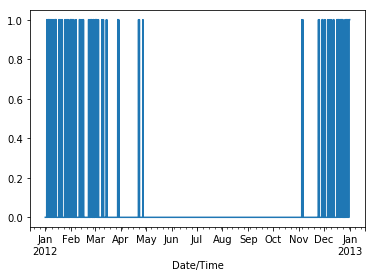

In [6]:
# More useful!
is_snowing = is_snowing.astype(int)  #(Tony) boolean type 不能繪圖
is_snowing.plot()

# 6.2 Use resampling to find the snowiest month

If we wanted the median temperature each month, we could use the `resample()` method like this:  
(Tony) 如果想要得到每個月均溫, 可以使用 `resample()` 函數  
(Tony) resample('M') 以月為單位重新取樣, 同理 'W' 以星期為單位  

In [19]:
resample_month = weather_2012['Temp (C)'].resample('M').apply(np.median)
print(resample_month.shape)
resample_month[:5]

(12,)


Date/Time
2012-01-31    -7.05
2012-02-29    -4.10
2012-03-31     2.60
2012-04-30     6.30
2012-05-31    16.05
Freq: M, Name: Temp (C), dtype: float64

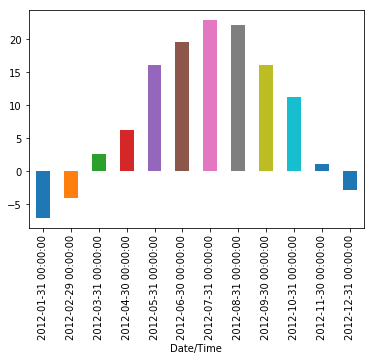

In [20]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')

Unsurprisingly, July and August are the warmest.  
(Tony) 毫無意外, 7 and 8 月溫度最高  

So we can think of snowiness as being a bunch of 1s and 0s instead of `True`s and `False`s:  
(Tony) 將是否下雪從 `True`s and `False`s 更改為 1s and 0s  

In [21]:
is_snowing.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
2012-01-01 05:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 07:00:00    0.0
2012-01-01 08:00:00    0.0
2012-01-01 09:00:00    0.0
Name: Weather, dtype: float64

and then use `resample` to find the percentage of time it was snowing each month  
(Tony) 然後用 `resample` 來找出每個月出現下雪的百分比  

In [22]:
is_snowing.astype(float).resample('M').apply(np.mean)

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

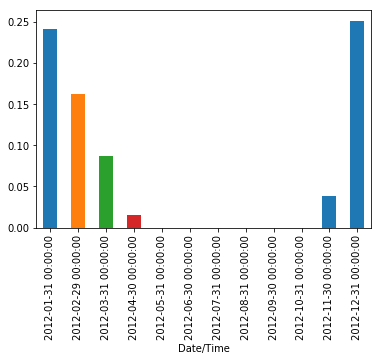

In [23]:
is_snowing.astype(float).resample('M').apply(np.mean).plot(kind='bar')

So now we know! In 2012, December was the snowiest month. Also, this graph suggests something that I feel -- it starts snowing pretty abruptly in November, and then tapers off slowly and takes a long time to stop, with the last snow usually being in April or May.  
(Tony) 現在我們知道了 2012 12月降雪最多的月份,  
(Tony) 同時, 從圖表上可清楚知道 11 月突然開始降雪, 之後逐漸減少一直到 4 or 5 月停止  

# 6.3 Plotting temperature and snowiness stats together

We can also combine these two statistics (temperature, and snowiness) into one dataframe and plot them together:  
(Tony) 我們也可以把溫度和降雪的情況結合在一起畫出來  

In [24]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

We'll use `concat` again to combine the two statistics into a single dataframe.  
(Tony) 把兩個 dataframe 串在同一個 dataframe 裡  

In [25]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


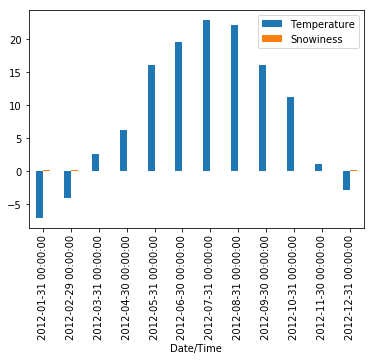

In [26]:
stats.plot(kind='bar')

Uh, that didn't work so well because the scale was wrong. We can do better by plotting them on two separate graphs:  
(Tony) 慘! 上圖並沒有把 Snowness show 出來, 問題在刻度不對上  
(Tony) 既然這樣就分開畫吧 subplots=True  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe33b3a4d30>,
      dtype=object)

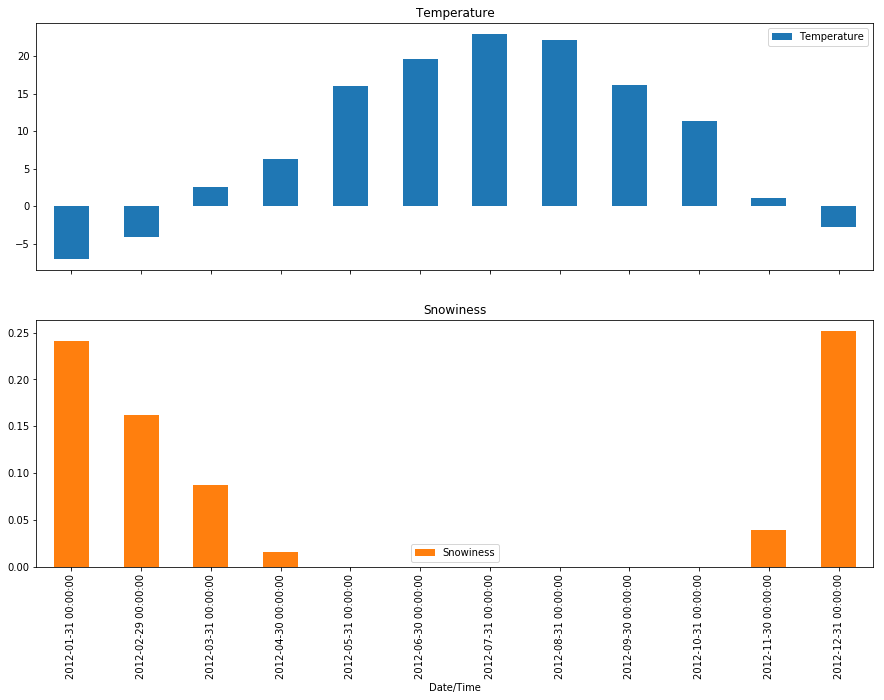

In [27]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  